# Assignment 3

Name: Ashish Nanda

Roll No.: J041

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Univariate Linear Regression

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Semester-V/ML_Experiment3/ex1data1.txt', header=None)

In [4]:
data.head(10)

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


In [5]:
data.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [6]:
# Assigning column names
data.columns = ['Population', 'Profit'] 

Text(0.5, 1.0, 'Profit vs Population')

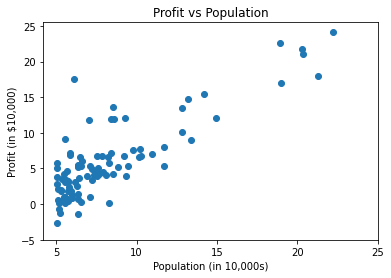

In [7]:
plt.scatter(data['Population'], data['Profit'])
plt.xticks(np.arange(5, 30, 5))
plt.yticks(np.arange(-5, 30, 5))
plt.xlabel('Population (in 10,000s)')
plt.ylabel('Profit (in $10,000)')
plt.title('Profit vs Population')

### Cost Function J(θ)

In [8]:
def computeCost(X,y,theta):
    """
    Take in a numpy array X, y, theta and get cost function using theta as parameter in a linear regression model
    """
    m = len(y)
    
    predictions = X.dot(theta)
    square_err = (predictions - y) ** 2
    
    return (1 / m) * np.sum(square_err)

In [9]:
data['x0'] = 1

In [10]:
data_val = data.values

m =  len(data_val[:-1])

X = data[['x0','Population']].iloc[:-1].values
y = data['Profit'][:-1].values.reshape(m, 1)

theta = np.zeros((2, 1))

In [11]:
m, X.shape, y.shape, theta.shape

(96, (96, 2), (96, 1), (2, 1))

In [12]:
computeCost(X, y, theta)

64.80968355754062

### Gradient Descent

In [13]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take numpy array for X, y, theta and update theta for every iteration of gradient steps
    Return theta and the list of cost of theta during each iteration
    """
    m = len(y)

    J_history = []

    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(), (predictions - y))
        descent = alpha * (1 / m) * error
        theta -= descent
        J_history.append(computeCost(X, y, theta))
        
    return theta, J_history

In [14]:
theta, J_history = gradientDescent(X, y, theta, 0.001, 2000)

In [15]:
print(f'h(x) = {str(round(theta[0, 0], 2))} + {str(round(theta[1, 0], 2))}X1')

h(x) = -1.11 + 0.92X1


In [16]:
from mpl_toolkits.mplot3d import Axes3D

# Generating values for theta0, theta1 and the resulting cost value
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i, j]=computeCost(X, y, t)

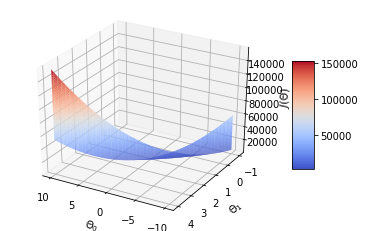

In [17]:
# Generating the surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='coolwarm')
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.view_init(30, 120) # rotate for better angle

Text(0.5, 1.0, 'Cost Function using Gradient Descent')

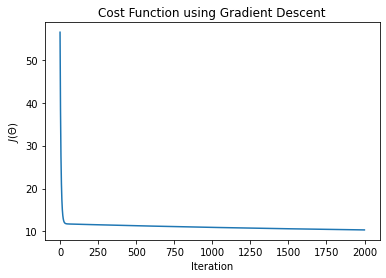

In [18]:
plt.plot(J_history)
plt.xlabel('Iteration')
plt.ylabel('$J(\Theta)$')
plt.title('Cost Function using Gradient Descent')

Text(0.5, 1.0, 'Profit vs Population')

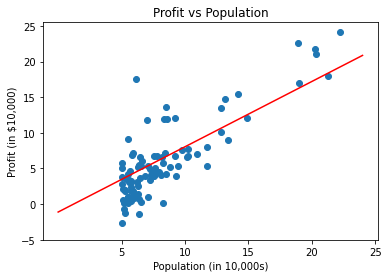

In [19]:
plt.scatter(data['Population'], data['Profit'])

x_value = [x for x in range(25)]
y_value = [(x * theta[1]) + theta[0] for x in x_value]

plt.plot(x_value, y_value, color = 'r')
plt.xticks(np.arange(5, 30, 5))
plt.yticks(np.arange(-5, 30, 5))
plt.xlabel('Population (in 10,000s)')
plt.ylabel('Profit (in $10,000)')
plt.title('Profit vs Population')

In [20]:
def predict(X, theta):
    """
    Takes in numpy array x and theta and returns predicted value of y
    """
    predictions = np.dot(X, theta)
    
    return predictions
    

In [21]:
data.tail(1)

,Population,Profit,x0
96,5.4369,0.61705,1


In [22]:
predict1 = predict(data[['x0', 'Population']].iloc[-1].values, theta) * 10000
print(f'For a population of 6170, the predicted profit is: ${predict1}')

For a population of 6170, the predicted profit is: $[38686.24610338]


## Multivariate Linear Regression

In [23]:
data2 = pd.read_csv('/content/drive/MyDrive/Semester-V/ML_Experiment3/ex1data2.txt', header=None)

data = data2.copy()

In [24]:
data.columns = ['Size of the house', 'Number of bedrooms', 'Price of the house']

In [25]:
data.head(10)

,Size of the house,Number of bedrooms,Price of the house
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [26]:
data.describe()

,Size of the house,Number of bedrooms,Price of the house
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [27]:
# Log normalizing the data
data.iloc[:, [0, 2]] = np.log(data.iloc[:, [0, 2]])

In [28]:
data.head(10)

,Size of the house,Number of bedrooms,Price of the house
0,7.651596,3,12.898970
1,7.377759,3,12.706545
2,7.783224,3,12.818552
3,7.255591,2,12.354493
4,8.006368,4,13.199139
5,7.593374,4,12.611204
6,7.335634,3,12.660010
7,7.263330,3,12.201055
8,7.229839,3,12.264342
9,7.309212,3,12.398757


In [29]:
data.shape

(47, 3)

In [30]:
# Splitting the data to X and y
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [31]:
alpha = 0.01

# Generating random theta values
X_n = X.shape[1]
np.random.seed(123)
theta = np.random.rand(X_n + 1)

In [32]:
# initial theta values
theta

array([0.69646919, 0.28613933, 0.22685145])

In [33]:
def GD(X, y, alpha, theta):
  X_n = X.shape[1]

  X = (np.array(X)).reshape(X.shape[0], X_n)
  y = (np.array(y)).reshape(y.shape[0], 1)

  X = np.c_[np.ones(X.shape[0]), X]

  m = y.size

  theta = theta.reshape(-1, 1)

  flag = True

  old_cost = None

  cost = []

  theta_history = []

  while flag:
    h_theta = np.dot(X, theta)

    error = h_theta - y

    cost_val = (1 / (2 * m)) * np.dot(error.T, error)

    cost_val = cost_val.tolist()

    if old_cost == cost_val or cost_val == 0:
      flag = False

    else:
      old_cost = cost_val

      cost.append(cost_val)

      theta = theta - alpha * ((1 / m) * np.dot(X.T, error))
      theta_history.append(theta)

  return cost, theta_history

In [34]:
def predict(X, theta):
    """
    Takes in numpy array X and theta and returns predicted value of y
    """
    X_n = X.shape[1]
    
    X = np.array(X)
    X = X.reshape(X.shape[0], X_n)
    X = np.c_[np.ones(X.shape[0]), X]

    theta = theta.reshape(-1, 1)
    
    predictions = np.dot(X, theta)
    
    return predictions

In [35]:
%%time
cost, best_theta = GD(X, y, alpha, theta)

CPU times: user 7.99 s, sys: 107 ms, total: 8.1 s
Wall time: 8.13 s


In [36]:
print(f'h(x) = {str(round(best_theta[-1][0][0], 2))} + {str(round(best_theta[-1][1][0], 2))}X1  {str(round(best_theta[-1][2][0], 2))}X2')

h(x) = 6.62 + 0.82X1  -0.03X2


In [37]:
y_pred = predict(X, theta)

In [42]:
cost = (np.asarray(cost)).reshape(-1, 1)

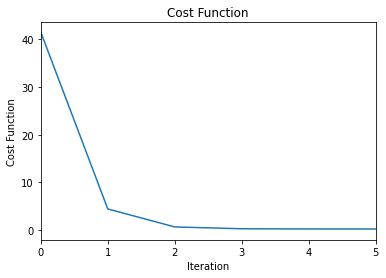

In [45]:
import matplotlib.pyplot as plt

plt.plot(cost)
plt.title('Cost Function')
plt.xlabel('Iteration')
plt.ylabel('Cost Function')
plt.xlim(0, 5)
plt.show()